In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
#data

# message sizes in powers of 2
sizes = 2**np.array(range(2, 34))

# nccl test data, times in us and bandwidths in GB/s

broadcast_times_2gpu = [
  6.75,  6.15,  6.17,  6.21,  6.23,  6.24,  6.44,  6.51,  7.17,  7.21,  7.82,  9.64, 13.69, 16.13, 20.94, 30.74, 
  42.70, 47.05, 51.53, 54.53, 59.98, 72.17, 102.1, 164.6, 299.4, 563.1,1092.3,2139.4,4231.1,8363.7, 16658, 33147,
]
broadcast_bandwidth_2gpu = [
    0.00,   0.00,   0.00,   0.01,   0.01,   0.02,   0.04,   0.08,   0.14,   0.28,   0.52,   0.85,   1.20,   2.03,   3.13,
    4.26,   6.14,  11.14,  20.35,  38.46,  69.93, 116.23, 164.31, 203.84, 224.13, 238.37, 245.74, 250.94, 253.77, 256.76, 257.83, 259.15,
]


broadcast_times_4gpu = [
    6.56,  6.51,  6.49,  6.46,  6.43,  6.47,  6.49,  6.59,  7.01,  7.82,  8.08,  9.00, 10.88, 14.98, 17.44, 22.31, 32.46, 45.93, 57.59,
    61.58, 67.71, 82.01, 121.8, 196.8, 352.3, 646.8,1240.6,2406.3,4715.2,9299.5, 18466, 36767
]
broadcast_bandwidth_4gpu = [ 
    0.00,  0.00,  0.00,  0.00,  0.01,  0.02,  0.04,  0.08,  0.15,  0.26,  0.51,  0.91,  1.51,  2.19,  3.76,  
    5.88,  8.08, 11.42, 18.21, 34.05, 61.94,102.29,137.73,170.47,190.51,207.51,216.37,223.11,227.72,230.92,232.59,233.63
]


broadcast_times_8gpu = [
   6.98,   6.81,   6.81,   6.82,   6.80,   6.79,   7.01,   7.04,   7.31,   7.99,  10.03,  10.89,  11.93,  13.86,  18.02,  20.36,  
   25.29,  36.46,  58.51,  62.11,  68.11,  83.09,  124.2,  204.4,  356.1,  652.1, 1241.5, 2402.8, 4701.2, 9279.9,  18429,  36723,
]
broadcast_bandwidth_8gpu = [
    0.00,0.00,0.00,0.00,0.01,0.02,0.04,0.07,0.14,0.26,0.41,0.75,1.37,2.36,3.64,6.44,
    10.37,14.38,17.92,33.76,61.58,100.96,135.04,164.20,188.46,205.82,216.23,223.44,228.40,
    231.41,233.05,233.91
]

# broadcast_bandwidth_corrected = sizes/(np.asarray(broadcast_times_8gpu)/1000000)/1000000000
# broadcast_bandwidth_effective = np.asarray(broadcast_bandwidth)*3


sendrecv1to1_times = [
    17.20,  16.60,  16.44,  16.48,  16.60,  16.58,  16.54,  16.53,  16.56,  16.55,  16.59,  16.57,  16.75,  17.32,  18.71,  
    21.21,  27.27,  41.40,  58.52,  69.33,  75.80,  86.05,  121.4,  184.9,  295.1,  548.6, 1057.1, 2073.3, 4101.0, 8155.1,  16268,  32495,
]
sendrecv1to1_bandwidth = [
    0.00,   0.00,   0.00,   0.00,   0.00,   0.01,   0.02,   0.03,   0.06,   0.12,   0.25,   0.49,   0.98,   1.89,   3.50,   6.18,   9.61,
    12.66,  17.92,  30.25,  55.34,  97.48, 138.19, 181.43, 227.43, 244.67, 253.94, 258.95, 261.83, 263.33, 264.01, 264.35,
]


sendrecv1to3_times = [
    22.72, 22.82, 22.82, 22.75, 22.88, 22.77, 22.82, 22.79, 22.69, 22.77, 22.89, 23.02, 23.36,
    24.12, 25.44, 27.74, 32.18, 45.23, 62.70, 74.16, 84.43, 135.9, 221.4, 413.0, 784.9,1541.2,3069.7,6117.2, 12208, 24375, 48748, 97505
]
sendrecv1to3_bandwidth = [
    0.00,  0.00,  0.00,  0.00,  0.01,  0.02,  0.03,  0.07,  0.14,  0.27,  0.54,  1.07,  2.10,  4.08,  7.73, 14.17, 
    24.44, 34.77, 50.17, 84.84,149.04,185.11,227.36,243.75,256.48,261.27,262.34,263.29,263.86,264.31,264.32,264.29
]


sendrecv1to7_times = [
    24.70, 24.71, 24.61, 24.57, 24.61, 24.56, 24.55, 24.66, 24.77, 24.74, 24.77, 24.81, 24.99, 25.76, 26.79, 29.15, 34.55, 46.41, 66.56, 84.89,
    154.4, 243.8, 452.5, 890.7,1779.5,3556.1,7107.2, 14212, 28414, 56816,113649,227318,
]
sendrecv1to7_bandwidth = [
    0.00,  0.00,  0.00,  0.01,  0.02,  0.04,  0.07,  0.15,  0.29,  0.58,  1.16,  2.31,  4.59,  8.91, 17.12, 31.48, 53.12, 
    79.08,110.27,172.92,190.12,240.87,259.53,263.70,263.98,264.20,264.39,264.43,264.53,264.58,264.54,264.52,
]


reduce_times_2gpu = [
    7.40,  7.42,  7.25,  7.38,  7.38,  7.42,  7.34,  7.34,  8.04,  8.06,  8.32,  8.00, 11.71, 14.32, 19.15, 29.34, 40.32, 
    42.97, 48.10, 51.87, 56.25, 68.88, 103.4, 167.9, 294.2, 547.3, 1054.7,2067.3,4095.4,8147.8, 16270, 32477,
]
reduce_bandwidth_2gpu = [
    0.00,   0.00,   0.00,   0.00,   0.01,   0.02,   0.03,   0.07,   0.13,   0.25,   0.49,   1.02,   1.40,   2.29,   3.42,   4.47,
    6.50,  12.20,  21.80,  40.43,  74.56, 121.79, 162.29, 199.90, 228.14, 245.24, 254.50, 259.70, 262.18, 263.57, 263.98, 264.50,
]


reduce_times_4gpu = [
    7.74,  7.83,  7.77,  7.34,  7.38,  7.34,  7.39,  7.42,  8.08,  9.53,  8.42,  8.77,  9.90, 14.12, 16.73, 21.83, 33.56, 
    46.78, 52.15, 56.62, 59.47, 71.89, 110.5, 185.3, 327.2, 608.8,1175.5,2305.1,4565.9,9082.9, 18128, 36214,
]
reduce_bandwidth_4gpu = [
    0.00,  0.00,  0.00,  0.00,  0.01,  0.02,  0.03,  0.07,  0.13,  0.21,  0.49,  0.93,  1.65,  2.32,  3.92,  6.00,  7.81, 11.21, 20.11, 37.04, 
    70.53, 116.69, 151.87, 181.06, 205.08, 220.45, 228.36, 232.90, 235.16, 236.43, 236.93, 237.20,
]


reduce_times_8gpu = [
   7.91,   7.94,   8.01,   8.05,   7.92,   7.82,   7.78,   7.19,   7.29,   8.50,  10.96,  11.26,  11.81,  13.21,  17.51,  21.08,  26.34,  37.21,  52.18,  55.93,
  60.94,  73.84,  111.6,  188.1,  331.4,  614.7, 1182.5, 2313.2, 4576.5, 9096.1,  18136,  36206,
]
reduce_bandwidth_8gpu = [
    0.00,   0.00,   0.00,   0.00,   0.01,   0.02,   0.03,   0.07,   0.14,   0.24,   0.37,   0.73,   1.39,   2.48,   3.74,   6.22,   9.95,  14.09,  20.10,  37.50,  68.82,
    113.61, 150.33, 178.43, 202.48, 218.33, 227.01, 232.09, 234.62, 236.09, 236.82, 237.25,
 ]

In [4]:
# smooth the data using a window with requested size.

# This method is based on the convolution of a scaled window with the signal.
# The signal is prepared by introducing reflected copies of the signal 
# (with the window size) in both ends so that transient parts are minimized
# in the begining and end part of the output signal.
def smooth(x,window_len=5,window='hanning'):
    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")
    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")
    if window_len<3:
        return x
    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")

    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y


In [5]:
# Possible functions that may fit the measured bandwidth
# define the true objective function
def sin(x, a, b, c, d):
	return a * np.sin(b - x) + c * x**2 + d

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

# fit the objective functions to the log base 2 of the message size and the resulting bandwidth data 
sizes_log2 = np.log2(sizes)

broadcast_bandwidth_8gpu_adjusted = sizes/(np.asarray(broadcast_times_8gpu)*1000)

# apply a smooth filter to the bandwidth curve, in this casse it helps the curve fit the data more accruately
broadcast_bandwidth_8gpu_smooth = smooth(np.asarray(broadcast_times_8gpu))[2:-2]
broadcast_bandwidth_8gpu_smooth = sizes/(broadcast_bandwidth_8gpu_smooth*1000)

# this is an mandatory initial guess of the parameters
p0 = [max(broadcast_bandwidth_8gpu_adjusted), np.median(sizes_log2), 1, min(broadcast_bandwidth_8gpu_adjusted)] 
p1 = [max(broadcast_bandwidth_8gpu_smooth), np.median(sizes_log2), 1, min(broadcast_bandwidth_8gpu_smooth)]

# find parameters for the sigmoid function
popt, pcov = curve_fit(sigmoid, sizes_log2, broadcast_bandwidth_8gpu_adjusted, p0, method='dogbox') 
popt2, pcov2 = curve_fit(sigmoid, sizes_log2, broadcast_bandwidth_8gpu_smooth, p0, method='dogbox', ) 
popt_sin, pcov_sin = curve_fit(sin, sizes_log2, broadcast_bandwidth_8gpu, p0, method='dogbox')

#make sure the parameters do not have a negative y offset
if popt[3] < 0:
    popt[3] = 0
if popt2[3] < 0:
    popt2[3] = 0

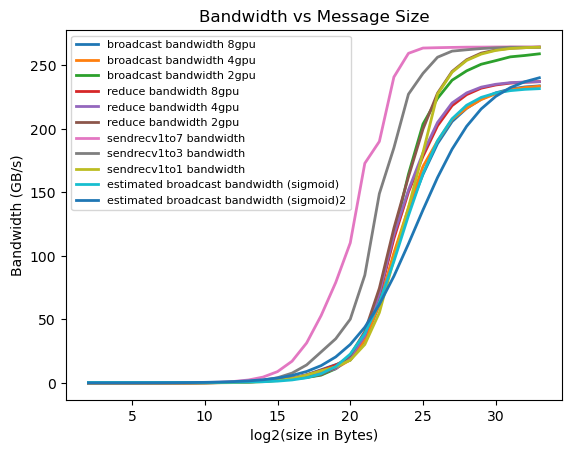

In [6]:
# Plot actual bandwidth of different opperators vs message size.
# Bandwidth = message_size / time

plt.figure()
plt.plot(np.log2(sizes), np.asarray(broadcast_bandwidth_8gpu), linewidth=2, label='broadcast bandwidth 8gpu')
plt.plot(np.log2(sizes), np.asarray(broadcast_bandwidth_4gpu), linewidth=2, label='broadcast bandwidth 4gpu')
plt.plot(np.log2(sizes), np.asarray(broadcast_bandwidth_2gpu), linewidth=2, label='broadcast bandwidth 2gpu')

plt.plot(np.log2(sizes), np.asarray(reduce_bandwidth_8gpu), linewidth=2, label='reduce bandwidth 8gpu')
plt.plot(np.log2(sizes), np.asarray(reduce_bandwidth_4gpu), linewidth=2, label='reduce bandwidth 4gpu')
plt.plot(np.log2(sizes), np.asarray(reduce_bandwidth_2gpu), linewidth=2, label='reduce bandwidth 2gpu')


plt.plot(np.log2(sizes), np.asarray(sendrecv1to7_bandwidth), linewidth=2, label='sendrecv1to7 bandwidth')
plt.plot(np.log2(sizes), np.asarray(sendrecv1to3_bandwidth), linewidth=2, label='sendrecv1to3 bandwidth')
plt.plot(np.log2(sizes), np.asarray(sendrecv1to1_bandwidth), linewidth=2, label='sendrecv1to1 bandwidth')

plt.plot(np.log2(sizes), sigmoid(sizes_log2, *popt), linewidth=2, label='estimated broadcast bandwidth (sigmoid)')
plt.plot(np.log2(sizes), sigmoid(sizes_log2, *popt2), linewidth=2, label='estimated broadcast bandwidth (smoothed sigmoid)')

plt.title('Bandwidth vs Message Size')
plt.xlabel("log2(size in Bytes)")
plt.ylabel("Bandwidth (GB/s)")
plt.legend(fontsize=8)

plt.show()

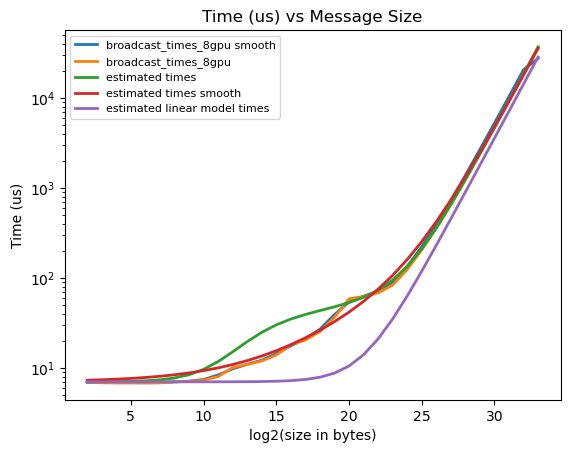

In [18]:
# Plot actual versus estimated times for the 8 gpu broadcast

plt.plot(np.log2(sizes), smooth(np.asarray(broadcast_times_8gpu))[2:-2], linewidth=2, label='broadcast_times_8gpu smooth')
plt.plot(np.log2(sizes), np.asarray(broadcast_times_8gpu), linewidth=2, label='broadcast_times_8gpu')
plt.plot(np.log2(sizes), (broadcast_times_8gpu[0]/1000000+sizes/(sigmoid(sizes_log2, *popt)*1000000000))*1000000, linewidth=2, label='estimated times sigmoid')
plt.plot(np.log2(sizes), (broadcast_times_8gpu[0]/1000000+sizes/(sigmoid(sizes_log2, *popt2)*1000000000))*1000000, linewidth=2, label='estimated times sigmoid smoothed')
plt.plot(np.log2(sizes), (broadcast_times_8gpu[0]/1000000+sizes/3e11)*1000000, linewidth=2, label='estimated linear model times')

plt.yscale("log")
plt.xlabel("log2(size in bytes)")
plt.ylabel("Time (us)")
plt.legend(fontsize=8)
plt.title('Time (us) vs Message Size')
plt.show()

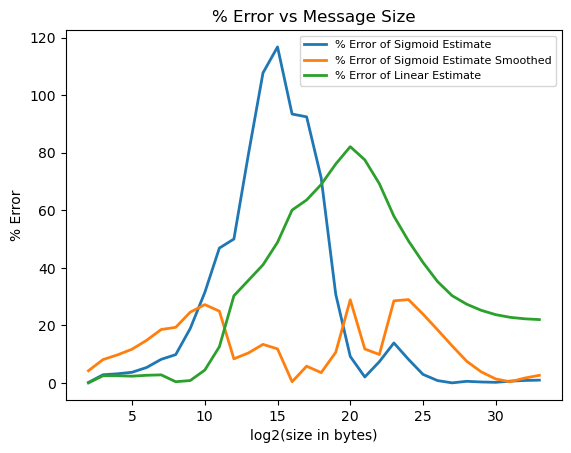

In [8]:
# plot the percent error in the estimated times

sig_est = (broadcast_times_8gpu[0]/1000000+sizes/(sigmoid(sizes_log2, *popt)*1000000000))*1000000
plt.plot(np.log2(sizes), 100*np.abs((sig_est - np.asarray(broadcast_times_8gpu))/np.asarray(broadcast_times_8gpu)), linewidth=2, label='% Error of Sigmoid Estimate')

sig_est_smoothed = (broadcast_times_8gpu[0]/1000000+sizes/(sigmoid(sizes_log2, *popt2)*1000000000))*1000000
plt.plot(np.log2(sizes), 100*np.abs((sig_est_smoothed - np.asarray(broadcast_times_8gpu))/np.asarray(broadcast_times_8gpu)), linewidth=2, label='% Error of Sigmoid Estimate Smoothed')

linear_est = (broadcast_times_8gpu[0]/1000000+sizes/3e11)*1000000
plt.plot(np.log2(sizes), 100*np.abs((linear_est - np.asarray(broadcast_times_8gpu))/np.asarray(broadcast_times_8gpu)), linewidth=2, label='% Error of Linear Estimate')

plt.xlabel("log2(size in bytes)")
plt.ylabel('% Error')
plt.legend(fontsize=8)
plt.title('% Error vs Message Size')
plt.show()

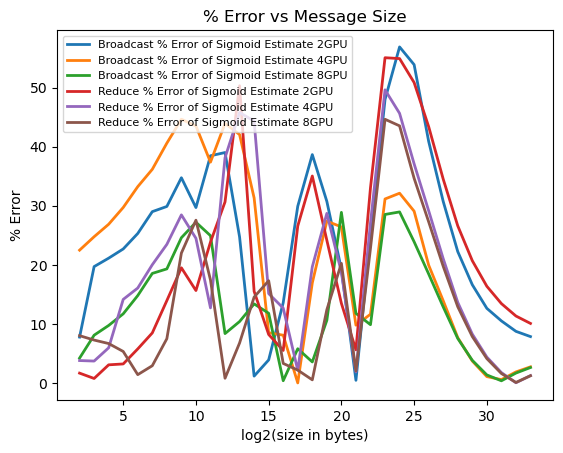

In [38]:
# Error of timing estimates for different numbers of gpus. bandwidth model was fit to the 8 gpu broadcast curve. 
# Might need to fit a bandidth model to each collective and/or at each message size?

sig_est_smoothed = (broadcast_times_8gpu[0]/1000000+sizes/(sigmoid(sizes_log2, *popt2)*1000000000))*1000000

plt.plot(np.log2(sizes), 100*np.abs((sig_est_smoothed - np.asarray(broadcast_times_2gpu))/np.asarray(broadcast_times_2gpu)), linewidth=2, label='Broadcast % Error of Sigmoid Estimate 2GPU')
plt.plot(np.log2(sizes), 100*np.abs((sig_est - np.asarray(broadcast_times_4gpu))/np.asarray(broadcast_times_4gpu)), linewidth=2, label='Broadcast % Error of Sigmoid Estimate 4GPU')
plt.plot(np.log2(sizes), 100*np.abs((sig_est_smoothed - np.asarray(broadcast_times_8gpu))/np.asarray(broadcast_times_8gpu)), linewidth=2, label='Broadcast % Error of Sigmoid Estimate 8GPU')
plt.plot(np.log2(sizes), 100*np.abs((sig_est_smoothed - np.asarray(reduce_times_2gpu))/np.asarray(reduce_times_2gpu)), linewidth=2, label='Reduce % Error of Sigmoid Estimate 2GPU')
plt.plot(np.log2(sizes), 100*np.abs((sig_est - np.asarray(reduce_times_4gpu))/np.asarray(reduce_times_4gpu)), linewidth=2, label='Reduce % Error of Sigmoid Estimate 4GPU')
plt.plot(np.log2(sizes), 100*np.abs((sig_est_smoothed - np.asarray(reduce_times_8gpu))/np.asarray(reduce_times_8gpu)), linewidth=2, label='Reduce % Error of Sigmoid Estimate 8GPU')

# linear_est = (broadcast_times_8gpu[0]/1000000+sizes/3e11)*1000000
# plt.plot(np.log2(sizes), 100*np.abs((linear_est - np.asarray(broadcast_times_8gpu))/np.asarray(broadcast_times_8gpu)), linewidth=2, label='% Error of Linear Estimate')

plt.xlabel("log2(size in bytes)")
plt.ylabel('% Error')
plt.legend(fontsize=8)
plt.title('% Error vs Message Size')
plt.show()

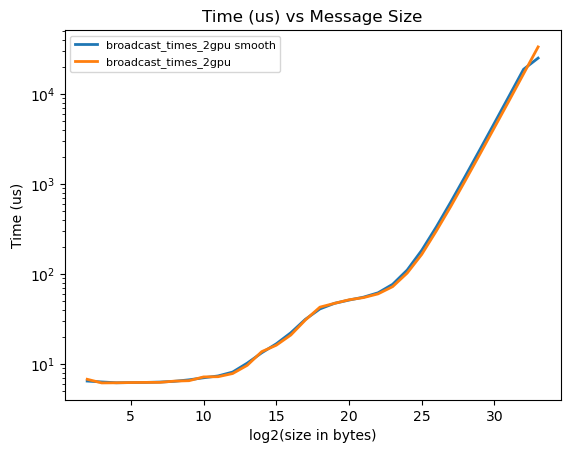

In [33]:
# Plot actual versus estimated times for the 8 gpu broadcast
plt.plot(np.log2(sizes), smooth(np.asarray(broadcast_times_2gpu))[2:-2], linewidth=2, label='broadcast_times_2gpu smooth')
plt.plot(np.log2(sizes), np.asarray(broadcast_times_2gpu), linewidth=2, label='broadcast_times_2gpu')
plt.yscale("log")
# plt.xlim([0,21])
# plt.ylim([0,100])
plt.xlabel("log2(size in bytes)")
plt.ylabel("Time (us)")
plt.legend(fontsize=8)
plt.title('Time (us) vs Message Size')
plt.show()

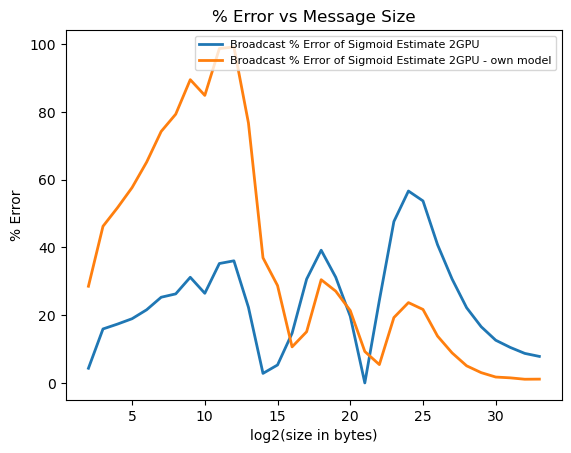

In [36]:
# At least in this case making a broadcast model spicific to 2 gpus does not improve the error across most of the input sizes. 
# Two gpus seems to be a slightly different function.

sig_est_smoothed = (broadcast_times_2gpu[0]/1000000+sizes/(sigmoid(sizes_log2, *popt2)*1000000000))*1000000
plt.plot(np.log2(sizes), 100*np.abs((sig_est_smoothed - np.asarray(broadcast_times_2gpu))/np.asarray(broadcast_times_2gpu)), linewidth=2, label='Broadcast % Error of Sigmoid Estimate 2GPU')

# sig_est_smoothed = (reduce_times_2gpu[0]/1000000+sizes/(sigmoid(sizes_log2, *popt2)*1000000000))*1000000
# plt.plot(np.log2(sizes), 100*np.abs((sig_est_smoothed - np.asarray(reduce_times_2gpu))/np.asarray(reduce_times_2gpu)), linewidth=2, label='Reduce % Error of Sigmoid Estimate 2GPU')


broadcast_bandwidth_2gpu_smooth = smooth(np.asarray(broadcast_times_2gpu), window_len=5)[2:-2]
broadcast_bandwidth_2gpu_smooth = sizes/(broadcast_bandwidth_2gpu_smooth*1000)
p_temp = [max(broadcast_bandwidth_2gpu_smooth), np.median(sizes_log2), 1, min(broadcast_bandwidth_2gpu_smooth)]
popt_temp, pcov_temp = curve_fit(sigmoid, sizes_log2, broadcast_bandwidth_2gpu_smooth, p0, method='dogbox', maxfev=10000)

if popt_temp[3] < 0:
    popt_temp[3] = 0

sig_est_smoothed2 = (broadcast_times_2gpu[0]/1000000+sizes/(sigmoid(sizes_log2, *popt_temp)*1000000000))*1000000
plt.plot(np.log2(sizes), 100*np.abs((sig_est_smoothed2 - np.asarray(broadcast_times_2gpu))/np.asarray(broadcast_times_2gpu)), linewidth=2, label='Broadcast % Error of Sigmoid Estimate 2GPU - own model')


plt.xlabel("log2(size in bytes)")
plt.ylabel('% Error')
plt.legend(fontsize=8)
plt.title('% Error vs Message Size')
plt.show()

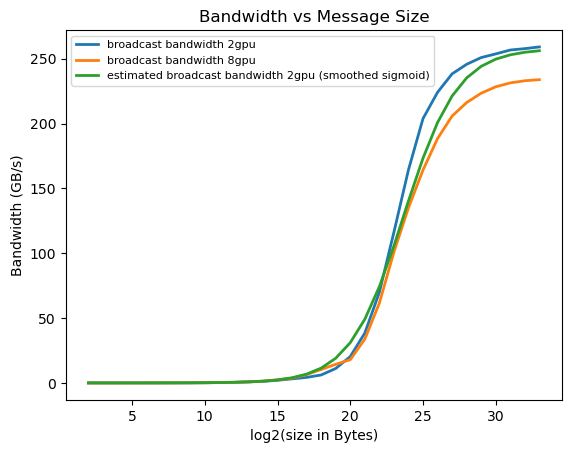

In [37]:
# plot the bandwith function that was fit to the 2 gpu broadcast. unfortunately the fit sigmoid curve is not as tight as for 8 gpus

plt.figure()
plt.plot(np.log2(sizes), np.asarray(broadcast_bandwidth_2gpu), linewidth=2, label='broadcast bandwidth 2gpu')
plt.plot(np.log2(sizes), np.asarray(broadcast_bandwidth_8gpu), linewidth=2, label='broadcast bandwidth 8gpu')

plt.plot(np.log2(sizes), sigmoid(sizes_log2, *popt_temp), linewidth=2, label='estimated broadcast bandwidth 2gpu (smoothed sigmoid)')

plt.title('Bandwidth vs Message Size')
plt.xlabel("log2(size in Bytes)")
plt.ylabel("Bandwidth (GB/s)")
plt.legend(fontsize=8)

plt.show()

In [ ]:
# Raw Data

(base) root@20978a23ad8c:~/nccl/nccl-tests/build# ./broadcast_perf -t 8 -g 1 -n 10000 -p 1 -b 2 -e 8589934592 -f 2 -c 0 -r 0
# nThread 8 nGpus 1 minBytes 2 maxBytes 8589934592 step: 2(factor) warmup iters: 5 iters: 10000 validation: 0 
# Parallel Init Enabled: threads call into NcclInitRank concurrently 
#
# Using devices
#   Rank  0 Pid  42597 on 20978a23ad8c device  0 [0x07] A100-SXM4-40GB
#   Rank  1 Pid  42597 on 20978a23ad8c device  1 [0x0a] A100-SXM4-40GB
#   Rank  2 Pid  42597 on 20978a23ad8c device  2 [0x47] A100-SXM4-40GB
#   Rank  3 Pid  42597 on 20978a23ad8c device  3 [0x4d] A100-SXM4-40GB
#   Rank  4 Pid  42597 on 20978a23ad8c device  4 [0x87] A100-SXM4-40GB
#   Rank  5 Pid  42597 on 20978a23ad8c device  5 [0x8d] A100-SXM4-40GB
#   Rank  6 Pid  42597 on 20978a23ad8c device  6 [0xc7] A100-SXM4-40GB
#   Rank  7 Pid  42597 on 20978a23ad8c device  7 [0xca] A100-SXM4-40GB
#
#                                                       out-of-place                       in-place          
#       size         count      type    root     time   algbw   busbw  error     time   algbw   busbw  error
#        (B)    (elements)                       (us)  (GB/s)  (GB/s)            (us)  (GB/s)  (GB/s)       
           0             0     float       0     3.99    0.00    0.00    N/A     3.85    0.00    0.00    N/A
           4             1     float       0     6.98    0.00    0.00    N/A     6.95    0.00    0.00    N/A
           8             2     float       0     6.81    0.00    0.00    N/A     6.80    0.00    0.00    N/A
          16             4     float       0     6.81    0.00    0.00    N/A     6.81    0.00    0.00    N/A
          32             8     float       0     6.82    0.00    0.00    N/A     6.81    0.00    0.00    N/A
          64            16     float       0     6.80    0.01    0.01    N/A     6.80    0.01    0.01    N/A
         128            32     float       0     6.79    0.02    0.02    N/A     6.80    0.02    0.02    N/A
         256            64     float       0     7.01    0.04    0.04    N/A     7.03    0.04    0.04    N/A
         512           128     float       0     7.04    0.07    0.07    N/A     7.05    0.07    0.07    N/A
        1024           256     float       0     7.31    0.14    0.14    N/A     7.33    0.14    0.14    N/A
        2048           512     float       0     7.99    0.26    0.26    N/A     7.89    0.26    0.26    N/A
        4096          1024     float       0    10.03    0.41    0.41    N/A     9.93    0.41    0.41    N/A
        8192          2048     float       0    10.89    0.75    0.75    N/A    10.50    0.78    0.78    N/A
       16384          4096     float       0    11.93    1.37    1.37    N/A    10.62    1.54    1.54    N/A
       32768          8192     float       0    13.86    2.36    2.36    N/A    13.24    2.47    2.47    N/A
       65536         16384     float       0    18.02    3.64    3.64    N/A    17.53    3.74    3.74    N/A
      131072         32768     float       0    20.36    6.44    6.44    N/A    20.11    6.52    6.52    N/A
      262144         65536     float       0    25.29   10.37   10.37    N/A    25.24   10.38   10.38    N/A
      524288        131072     float       0    36.46   14.38   14.38    N/A    36.47   14.38   14.38    N/A
     1048576        262144     float       0    58.51   17.92   17.92    N/A    58.46   17.94   17.94    N/A
     2097152        524288     float       0    62.11   33.76   33.76    N/A    62.11   33.77   33.77    N/A
     4194304       1048576     float       0    68.11   61.58   61.58    N/A    68.54   61.19   61.19    N/A
     8388608       2097152     float       0    83.09  100.96  100.96    N/A    83.10  100.95  100.95    N/A
    16777216       4194304     float       0    124.2  135.04  135.04    N/A    123.9  135.37  135.37    N/A
    33554432       8388608     float       0    204.4  164.20  164.20    N/A    204.2  164.28  164.28    N/A
    67108864      16777216     float       0    356.1  188.46  188.46    N/A    356.0  188.50  188.50    N/A
   134217728      33554432     float       0    652.1  205.82  205.82    N/A    652.0  205.85  205.85    N/A
   268435456      67108864     float       0   1241.5  216.23  216.23    N/A   1240.7  216.35  216.35    N/A
   536870912     134217728     float       0   2402.8  223.44  223.44    N/A   2387.8  224.84  224.84    N/A
  1073741824     268435456     float       0   4701.2  228.40  228.40    N/A   4679.6  229.45  229.45    N/A
  2147483648     536870912     float       0   9279.9  231.41  231.41    N/A   9256.3  232.00  232.00    N/A
  4294967296    1073741824     float       0    18429  233.05  233.05    N/A    18410  233.30  233.30    N/A
  8589934592    2147483648     float       0    36723  233.91  233.91    N/A    36716  233.95  233.95    N/A
# Out of bounds values : 0 OK
# Avg bus bandwidth    : 70.1965 
#
(base) root@20978a23ad8c:~/nccl/nccl-tests/build# 

(base) root@20978a23ad8c:~/nccl/nccl-tests/build# ./broadcast_perf -t 4 -g 1 -n 10000 -p 1 -b 2 -e 8589934592 -f 2 -c 0 -r 0
# nThread 4 nGpus 1 minBytes 2 maxBytes 8589934592 step: 2(factor) warmup iters: 5 iters: 10000 validation: 0 
# Parallel Init Enabled: threads call into NcclInitRank concurrently 
#
# Using devices
#   Rank  0 Pid  44944 on 20978a23ad8c device  0 [0x07] A100-SXM4-40GB
#   Rank  1 Pid  44944 on 20978a23ad8c device  1 [0x0a] A100-SXM4-40GB
#   Rank  2 Pid  44944 on 20978a23ad8c device  2 [0x47] A100-SXM4-40GB
#   Rank  3 Pid  44944 on 20978a23ad8c device  3 [0x4d] A100-SXM4-40GB
#
#                                                       out-of-place                       in-place          
#       size         count      type    root     time   algbw   busbw  error     time   algbw   busbw  error
#        (B)    (elements)                       (us)  (GB/s)  (GB/s)            (us)  (GB/s)  (GB/s)       
           0             0     float       0     3.91    0.00    0.00    N/A     3.66    0.00    0.00    N/A
           4             1     float       0     6.56    0.00    0.00    N/A     6.56    0.00    0.00    N/A
           8             2     float       0     6.51    0.00    0.00    N/A     6.50    0.00    0.00    N/A
          16             4     float       0     6.49    0.00    0.00    N/A     6.50    0.00    0.00    N/A
          32             8     float       0     6.46    0.00    0.00    N/A     6.44    0.00    0.00    N/A
          64            16     float       0     6.43    0.01    0.01    N/A     6.43    0.01    0.01    N/A
         128            32     float       0     6.47    0.02    0.02    N/A     6.49    0.02    0.02    N/A
         256            64     float       0     6.49    0.04    0.04    N/A     6.49    0.04    0.04    N/A
         512           128     float       0     6.59    0.08    0.08    N/A     6.69    0.08    0.08    N/A
        1024           256     float       0     7.01    0.15    0.15    N/A     6.95    0.15    0.15    N/A
        2048           512     float       0     7.82    0.26    0.26    N/A     7.57    0.27    0.27    N/A
        4096          1024     float       0     8.08    0.51    0.51    N/A     8.10    0.51    0.51    N/A
        8192          2048     float       0     9.00    0.91    0.91    N/A     8.34    0.98    0.98    N/A
       16384          4096     float       0    10.88    1.51    1.51    N/A    10.29    1.59    1.59    N/A
       32768          8192     float       0    14.98    2.19    2.19    N/A    14.55    2.25    2.25    N/A
       65536         16384     float       0    17.44    3.76    3.76    N/A    17.06    3.84    3.84    N/A
      131072         32768     float       0    22.31    5.88    5.88    N/A    21.86    6.00    6.00    N/A
      262144         65536     float       0    32.46    8.08    8.08    N/A    32.25    8.13    8.13    N/A
      524288        131072     float       0    45.93   11.42   11.42    N/A    46.12   11.37   11.37    N/A
     1048576        262144     float       0    57.59   18.21   18.21    N/A    57.71   18.17   18.17    N/A
     2097152        524288     float       0    61.58   34.05   34.05    N/A    61.71   33.98   33.98    N/A
     4194304       1048576     float       0    67.71   61.94   61.94    N/A    67.73   61.93   61.93    N/A
     8388608       2097152     float       0    82.01  102.29  102.29    N/A    81.58  102.83  102.83    N/A
    16777216       4194304     float       0    121.8  137.73  137.73    N/A    121.6  138.00  138.00    N/A
    33554432       8388608     float       0    196.8  170.47  170.47    N/A    195.4  171.69  171.69    N/A
    67108864      16777216     float       0    352.3  190.51  190.51    N/A    349.7  191.90  191.90    N/A
   134217728      33554432     float       0    646.8  207.51  207.51    N/A    642.4  208.95  208.95    N/A
   268435456      67108864     float       0   1240.6  216.37  216.37    N/A   1228.6  218.49  218.49    N/A
   536870912     134217728     float       0   2406.3  223.11  223.11    N/A   2371.0  226.43  226.43    N/A
  1073741824     268435456     float       0   4715.2  227.72  227.72    N/A   4643.2  231.25  231.25    N/A
  2147483648     536870912     float       0   9299.5  230.92  230.92    N/A   9181.5  233.89  233.89    N/A
  4294967296    1073741824     float       0    18466  232.59  232.59    N/A    18286  234.87  234.87    N/A
  8589934592    2147483648     float       0    36767  233.63  233.63    N/A    36507  235.30  235.30    N/A
# Out of bounds values : 0 OK
# Avg bus bandwidth    : 70.6782 

(base) root@20978a23ad8c:~/nccl/nccl-tests/build# ./broadcast_perf -t 1 -g 4 -n 100 -p 1 -b 2 -e 8589934592 -f 2 -c 0 -r 0 -a 0
# nThread 1 nGpus 4 minBytes 2 maxBytes 8589934592 step: 2(factor) warmup iters: 5 iters: 100 validation: 0 
# Parallel Init Enabled: threads call into NcclInitRank concurrently 
#
# Using devices
#   Rank  0 Pid  61039 on 20978a23ad8c device  0 [0x07] A100-SXM4-40GB
#   Rank  1 Pid  61039 on 20978a23ad8c device  1 [0x0a] A100-SXM4-40GB
#   Rank  2 Pid  61039 on 20978a23ad8c device  2 [0x47] A100-SXM4-40GB
#   Rank  3 Pid  61039 on 20978a23ad8c device  3 [0x4d] A100-SXM4-40GB
#
#                                                       out-of-place                       in-place          
#       size         count      type    root     time   algbw   busbw  error     time   algbw   busbw  error
#        (B)    (elements)                       (us)  (GB/s)  (GB/s)            (us)  (GB/s)  (GB/s)       
           0             0     float       0    17.25    0.00    0.00    N/A    17.40    0.00    0.00    N/A
           4             1     float       0    17.60    0.00    0.00    N/A    17.54    0.00    0.00    N/A
           8             2     float       0    17.46    0.00    0.00    N/A    17.15    0.00    0.00    N/A
          16             4     float       0    17.43    0.00    0.00    N/A    17.33    0.00    0.00    N/A
          32             8     float       0    17.51    0.00    0.00    N/A    17.71    0.00    0.00    N/A
          64            16     float       0    16.85    0.00    0.00    N/A    17.03    0.00    0.00    N/A
         128            32     float       0    16.91    0.01    0.01    N/A    17.04    0.01    0.01    N/A
         256            64     float       0    17.09    0.01    0.01    N/A    17.16    0.01    0.01    N/A
         512           128     float       0    17.00    0.03    0.03    N/A    16.97    0.03    0.03    N/A
        1024           256     float       0    16.93    0.06    0.06    N/A    17.00    0.06    0.06    N/A
        2048           512     float       0    16.34    0.13    0.13    N/A    16.12    0.13    0.13    N/A
        4096          1024     float       0    16.17    0.25    0.25    N/A    15.97    0.26    0.26    N/A
        8192          2048     float       0    15.91    0.51    0.51    N/A    15.98    0.51    0.51    N/A
       16384          4096     float       0    16.03    1.02    1.02    N/A    16.04    1.02    1.02    N/A
       32768          8192     float       0    17.33    1.89    1.89    N/A    17.35    1.89    1.89    N/A
       65536         16384     float       0    20.35    3.22    3.22    N/A    20.20    3.24    3.24    N/A
      131072         32768     float       0    25.62    5.12    5.12    N/A    25.66    5.11    5.11    N/A
      262144         65536     float       0    37.22    7.04    7.04    N/A    37.19    7.05    7.05    N/A
      524288        131072     float       0    49.81   10.53   10.53    N/A    46.27   11.33   11.33    N/A
     1048576        262144     float       0    58.09   18.05   18.05    N/A    58.02   18.07   18.07    N/A
     2097152        524288     float       0    61.20   34.26   34.26    N/A    61.52   34.09   34.09    N/A
     4194304       1048576     float       0    67.24   62.38   62.38    N/A    67.57   62.07   62.07    N/A
     8388608       2097152     float       0    81.90  102.43  102.43    N/A    81.81  102.53  102.53    N/A
    16777216       4194304     float       0    121.2  138.42  138.42    N/A    120.7  138.97  138.97    N/A
    33554432       8388608     float       0    195.2  171.93  171.93    N/A    194.4  172.58  172.58    N/A
    67108864      16777216     float       0    347.9  192.90  192.90    N/A    347.2  193.31  193.31    N/A
   134217728      33554432     float       0    637.4  210.56  210.56    N/A    634.1  211.65  211.65    N/A
   268435456      67108864     float       0   1216.0  220.76  220.76    N/A   1208.5  222.12  222.12    N/A
   536870912     134217728     float       0   2355.1  227.97  227.97    N/A   2345.9  228.85  228.85    N/A
  1073741824     268435456     float       0   4644.2  231.20  231.20    N/A   4628.5  231.99  231.99    N/A
  2147483648     536870912     float       0   9208.4  233.21  233.21    N/A   9180.7  233.91  233.91    N/A
  4294967296    1073741824     float       0    18366  233.86  233.86    N/A    18290  234.83  234.83    N/A
  8589934592    2147483648     float       0    36612  234.62  234.62    N/A    36511  235.27  235.27    N/A
# Out of bounds values : 0 OK
# Avg bus bandwidth    : 71.1104 

(base) root@7688f6d5e2b4:~/nccl-tests/build# ./sendrecv1to7_perf -t 8 -g 1 -n 1000 -p 1 -b 2 -e 8589934592 -f 2 -c 0 -r 0
# nThread 8 nGpus 1 minBytes 2 maxBytes 8589934592 step: 2(factor) warmup iters: 5 iters: 1000 validation: 0 
# Parallel Init Enabled: threads call into NcclInitRank concurrently 
#
# Using devices
#   Rank  0 Pid   2391 on 7688f6d5e2b4 device  0 [0x07] A100-SXM4-40GB
#   Rank  1 Pid   2391 on 7688f6d5e2b4 device  1 [0x0a] A100-SXM4-40GB
#   Rank  2 Pid   2391 on 7688f6d5e2b4 device  2 [0x47] A100-SXM4-40GB
#   Rank  3 Pid   2391 on 7688f6d5e2b4 device  3 [0x4d] A100-SXM4-40GB
#   Rank  4 Pid   2391 on 7688f6d5e2b4 device  4 [0x87] A100-SXM4-40GB
#   Rank  5 Pid   2391 on 7688f6d5e2b4 device  5 [0x8d] A100-SXM4-40GB
#   Rank  6 Pid   2391 on 7688f6d5e2b4 device  6 [0xc7] A100-SXM4-40GB
#   Rank  7 Pid   2391 on 7688f6d5e2b4 device  7 [0xca] A100-SXM4-40GB
#
#                                               out-of-place                       in-place          
#       size         count      type     time   algbw   busbw  error     time   algbw   busbw  error
#        (B)    (elements)               (us)  (GB/s)  (GB/s)            (us)  (GB/s)  (GB/s)       
           0             0     float    22.14    0.00    0.00    N/A
           4             1     float    24.70    0.00    0.00    N/A
           8             2     float    24.71    0.00    0.00    N/A
          16             4     float    24.61    0.00    0.00    N/A
          32             8     float    24.57    0.01    0.01    N/A
          64            16     float    24.61    0.02    0.02    N/A
         128            32     float    24.56    0.04    0.04    N/A
         256            64     float    24.55    0.07    0.07    N/A
         512           128     float    24.66    0.15    0.15    N/A
        1024           256     float    24.77    0.29    0.29    N/A
        2048           512     float    24.74    0.58    0.58    N/A
        4096          1024     float    24.77    1.16    1.16    N/A
        8192          2048     float    24.81    2.31    2.31    N/A
       16384          4096     float    24.99    4.59    4.59    N/A
       32768          8192     float    25.76    8.91    8.91    N/A
       65536         16384     float    26.79   17.12   17.12    N/A
      131072         32768     float    29.15   31.48   31.48    N/A
      262144         65536     float    34.55   53.12   53.12    N/A
      524288        131072     float    46.41   79.08   79.08    N/A
     1048576        262144     float    66.56  110.27  110.27    N/A
     2097152        524288     float    84.89  172.92  172.92    N/A
     4194304       1048576     float    154.4  190.12  190.12    N/A
     8388608       2097152     float    243.8  240.87  240.87    N/A
    16777216       4194304     float    452.5  259.53  259.53    N/A
    33554432       8388608     float    890.7  263.70  263.70    N/A
    67108864      16777216     float   1779.5  263.98  263.98    N/A
   134217728      33554432     float   3556.1  264.20  264.20    N/A
   268435456      67108864     float   7107.2  264.39  264.39    N/A
   536870912     134217728     float    14212  264.43  264.43    N/A
  1073741824     268435456     float    28414  264.53  264.53    N/A
  2147483648     536870912     float    56816  264.58  264.58    N/A
  4294967296    1073741824     float   113649  264.54  264.54    N/A
  8589934592    2147483648     float   227318  264.52  264.52    N/A
# Out of bounds values : 0 OK
# Avg bus bandwidth    : 107.621 
#

(base) root@20978a23ad8c:~/nccl/nccl-tests/build# ./sendrecv1to3_perf -t 4 -g 1 -n 100 -p 1 -b 2 -e 8589934592 -f 2 -c 0 -r 0 -a 0
# nThread 4 nGpus 1 minBytes 2 maxBytes 8589934592 step: 2(factor) warmup iters: 5 iters: 100 validation: 0 
# Parallel Init Enabled: threads call into NcclInitRank concurrently 
#
# Using devices
#   Rank  0 Pid  61223 on 20978a23ad8c device  0 [0x07] A100-SXM4-40GB
#   Rank  1 Pid  61223 on 20978a23ad8c device  1 [0x0a] A100-SXM4-40GB
#   Rank  2 Pid  61223 on 20978a23ad8c device  2 [0x47] A100-SXM4-40GB
#   Rank  3 Pid  61223 on 20978a23ad8c device  3 [0x4d] A100-SXM4-40GB
#
#                                               out-of-place                       in-place          
#       size         count      type     time   algbw   busbw  error     time   algbw   busbw  error
#        (B)    (elements)               (us)  (GB/s)  (GB/s)            (us)  (GB/s)  (GB/s)       
           0             0     float    18.14    0.00    0.00    N/A    18.17    0.00    0.00    N/A
           4             1     float    22.72    0.00    0.00    N/A    22.85    0.00    0.00    N/A
           8             2     float    22.82    0.00    0.00    N/A    22.78    0.00    0.00    N/A
          16             4     float    22.82    0.00    0.00    N/A    22.67    0.00    0.00    N/A
          32             8     float    22.75    0.00    0.00    N/A    22.76    0.00    0.00    N/A
          64            16     float    22.88    0.01    0.01    N/A    22.73    0.01    0.01    N/A
         128            32     float    22.77    0.02    0.02    N/A    22.75    0.02    0.02    N/A
         256            64     float    22.82    0.03    0.03    N/A    22.73    0.03    0.03    N/A
         512           128     float    22.79    0.07    0.07    N/A    22.72    0.07    0.07    N/A
        1024           256     float    22.69    0.14    0.14    N/A    22.62    0.14    0.14    N/A
        2048           512     float    22.77    0.27    0.27    N/A    22.77    0.27    0.27    N/A
        4096          1024     float    22.89    0.54    0.54    N/A    22.95    0.54    0.54    N/A
        8192          2048     float    23.02    1.07    1.07    N/A    22.91    1.07    1.07    N/A
       16384          4096     float    23.36    2.10    2.10    N/A    23.38    2.10    2.10    N/A
       32768          8192     float    24.12    4.08    4.08    N/A    24.16    4.07    4.07    N/A
       65536         16384     float    25.44    7.73    7.73    N/A    25.43    7.73    7.73    N/A
      131072         32768     float    27.74   14.17   14.17    N/A    27.79   14.15   14.15    N/A
      262144         65536     float    32.18   24.44   24.44    N/A    32.20   24.42   24.42    N/A
      524288        131072     float    45.23   34.77   34.77    N/A    45.26   34.75   34.75    N/A
     1048576        262144     float    62.70   50.17   50.17    N/A    62.55   50.29   50.29    N/A
     2097152        524288     float    74.16   84.84   84.84    N/A    73.78   85.28   85.28    N/A
     4194304       1048576     float    84.43  149.04  149.04    N/A    87.96  143.05  143.05    N/A
     8388608       2097152     float    135.9  185.11  185.11    N/A    136.5  184.37  184.37    N/A
    16777216       4194304     float    221.4  227.36  227.36    N/A    225.5  223.18  223.18    N/A
    33554432       8388608     float    413.0  243.75  243.75    N/A    413.6  243.36  243.36    N/A
    67108864      16777216     float    784.9  256.48  256.48    N/A    785.3  256.36  256.36    N/A
   134217728      33554432     float   1541.2  261.27  261.27    N/A   1537.4  261.91  261.91    N/A
   268435456      67108864     float   3069.7  262.34  262.34    N/A   3069.7  262.34  262.34    N/A
   536870912     134217728     float   6117.2  263.29  263.29    N/A   6116.3  263.33  263.33    N/A
  1073741824     268435456     float    12208  263.86  263.86    N/A    12209  263.84  263.84    N/A
  2147483648     536870912     float    24375  264.31  264.31    N/A    24402  264.01  264.01    N/A
  4294967296    1073741824     float    48748  264.32  264.32    N/A    48728  264.43  264.43    N/A
  8589934592    2147483648     float    97505  264.29  264.29    N/A    97510  264.28  264.28    N/A
# Out of bounds values : 0 OK
# Avg bus bandwidth    : 94.6857 

(base) root@7688f6d5e2b4:~/nccl-tests/build# ./sendrecv1to1_perf -t 2 -g 1 -n 1000 -p 1 -b 2 -e 8589934592 -f 2 -c 0 -r 0
# nThread 2 nGpus 1 minBytes 2 maxBytes 8589934592 step: 2(factor) warmup iters: 5 iters: 1000 validation: 0 
# Parallel Init Enabled: threads call into NcclInitRank concurrently 
#
# Using devices
#   Rank  0 Pid   2524 on 7688f6d5e2b4 device  0 [0x07] A100-SXM4-40GB
#   Rank  1 Pid   2524 on 7688f6d5e2b4 device  1 [0x0a] A100-SXM4-40GB
#
#                                               out-of-place                       in-place          
#       size         count      type     time   algbw   busbw  error     time   algbw   busbw  error
#        (B)    (elements)               (us)  (GB/s)  (GB/s)            (us)  (GB/s)  (GB/s)       
           0             0     float    17.23    0.00    0.00    N/A
           4             1     float    17.20    0.00    0.00    N/A
           8             2     float    16.60    0.00    0.00    N/A
          16             4     float    16.44    0.00    0.00    N/A
          32             8     float    16.48    0.00    0.00    N/A
          64            16     float    16.60    0.00    0.00    N/A
         128            32     float    16.58    0.01    0.01    N/A
         256            64     float    16.54    0.02    0.02    N/A
         512           128     float    16.53    0.03    0.03    N/A
        1024           256     float    16.56    0.06    0.06    N/A
        2048           512     float    16.55    0.12    0.12    N/A
        4096          1024     float    16.59    0.25    0.25    N/A
        8192          2048     float    16.57    0.49    0.49    N/A
       16384          4096     float    16.75    0.98    0.98    N/A
       32768          8192     float    17.32    1.89    1.89    N/A
       65536         16384     float    18.71    3.50    3.50    N/A
      131072         32768     float    21.21    6.18    6.18    N/A
      262144         65536     float    27.27    9.61    9.61    N/A
      524288        131072     float    41.40   12.66   12.66    N/A
     1048576        262144     float    58.52   17.92   17.92    N/A
     2097152        524288     float    69.33   30.25   30.25    N/A
     4194304       1048576     float    75.80   55.34   55.34    N/A
     8388608       2097152     float    86.05   97.48   97.48    N/A
    16777216       4194304     float    121.4  138.19  138.19    N/A
    33554432       8388608     float    184.9  181.43  181.43    N/A
    67108864      16777216     float    295.1  227.43  227.43    N/A
   134217728      33554432     float    548.6  244.67  244.67    N/A
   268435456      67108864     float   1057.1  253.94  253.94    N/A
   536870912     134217728     float   2073.3  258.95  258.95    N/A
  1073741824     268435456     float   4101.0  261.83  261.83    N/A
  2147483648     536870912     float   8155.1  263.33  263.33    N/A
  4294967296    1073741824     float    16268  264.01  264.01    N/A
  8589934592    2147483648     float    32495  264.35  264.35    N/A
# Out of bounds values : 0 OK
# Avg bus bandwidth    : 78.6344 
#


(base) root@7688f6d5e2b4:~/nccl-tests/build# ./broadcast_perf -t 2 -g 1 -n 10000 -p 1 -b 2 -e 8589934592 -f 2 -c 0 -r 0
# nThread 2 nGpus 1 minBytes 2 maxBytes 8589934592 step: 2(factor) warmup iters: 5 iters: 10000 validation: 0 
# Parallel Init Enabled: threads call into NcclInitRank concurrently 
#
# Using devices
#   Rank  0 Pid   1556 on 7688f6d5e2b4 device  0 [0x07] A100-SXM4-40GB
#   Rank  1 Pid   1556 on 7688f6d5e2b4 device  1 [0x0a] A100-SXM4-40GB
#
#                                                       out-of-place                       in-place          
#       size         count      type    root     time   algbw   busbw  error     time   algbw   busbw  error
#        (B)    (elements)                       (us)  (GB/s)  (GB/s)            (us)  (GB/s)  (GB/s)       
           0             0     float       0     3.89    0.00    0.00    N/A
           4             1     float       0     6.75    0.00    0.00    N/A
           8             2     float       0     6.15    0.00    0.00    N/A
          16             4     float       0     6.17    0.00    0.00    N/A
          32             8     float       0     6.21    0.01    0.01    N/A
          64            16     float       0     6.23    0.01    0.01    N/A
         128            32     float       0     6.24    0.02    0.02    N/A
         256            64     float       0     6.44    0.04    0.04    N/A
         512           128     float       0     6.51    0.08    0.08    N/A
        1024           256     float       0     7.17    0.14    0.14    N/A
        2048           512     float       0     7.21    0.28    0.28    N/A
        4096          1024     float       0     7.82    0.52    0.52    N/A
        8192          2048     float       0     9.64    0.85    0.85    N/A
       16384          4096     float       0    13.69    1.20    1.20    N/A
       32768          8192     float       0    16.13    2.03    2.03    N/A
       65536         16384     float       0    20.94    3.13    3.13    N/A
      131072         32768     float       0    30.74    4.26    4.26    N/A
      262144         65536     float       0    42.70    6.14    6.14    N/A
      524288        131072     float       0    47.05   11.14   11.14    N/A
     1048576        262144     float       0    51.53   20.35   20.35    N/A
     2097152        524288     float       0    54.53   38.46   38.46    N/A
     4194304       1048576     float       0    59.98   69.93   69.93    N/A
     8388608       2097152     float       0    72.17  116.23  116.23    N/A
    16777216       4194304     float       0    102.1  164.31  164.31    N/A
    33554432       8388608     float       0    164.6  203.84  203.84    N/A
    67108864      16777216     float       0    299.4  224.13  224.13    N/A
   134217728      33554432     float       0    563.1  238.37  238.37    N/A
   268435456      67108864     float       0   1092.3  245.74  245.74    N/A
   536870912     134217728     float       0   2139.4  250.94  250.94    N/A
  1073741824     268435456     float       0   4231.1  253.77  253.77    N/A
  2147483648     536870912     float       0   8363.7  256.76  256.76    N/A
  4294967296    1073741824     float       0    16658  257.83  257.83    N/A
  8589934592    2147483648     float       0    33147  259.15  259.15    N/A
# Out of bounds values : 0 OK
# Avg bus bandwidth    : 79.6877 
#

(base) root@7688f6d5e2b4:~/nccl-tests/build# ./reduce_perf -t 2 -g 1 -n 1000 -p 1 -b 2 -e 8589934592 -f 2 -c 0 -r 0
# nThread 2 nGpus 1 minBytes 2 maxBytes 8589934592 step: 2(factor) warmup iters: 5 iters: 1000 validation: 0 
# Parallel Init Enabled: threads call into NcclInitRank concurrently 
#
# Using devices
#   Rank  0 Pid   2026 on 7688f6d5e2b4 device  0 [0x07] A100-SXM4-40GB
#   Rank  1 Pid   2026 on 7688f6d5e2b4 device  1 [0x0a] A100-SXM4-40GB
#
#                                                       out-of-place                       in-place          
#       size         count      type   redop    root     time   algbw   busbw  error     time   algbw   busbw  error
#        (B)    (elements)                               (us)  (GB/s)  (GB/s)            (us)  (GB/s)  (GB/s)       
           0             0     float     sum       0     4.06    0.00    0.00    N/A
           4             1     float     sum       0     7.40    0.00    0.00    N/A
           8             2     float     sum       0     7.42    0.00    0.00    N/A
          16             4     float     sum       0     7.25    0.00    0.00    N/A
          32             8     float     sum       0     7.38    0.00    0.00    N/A
          64            16     float     sum       0     7.38    0.01    0.01    N/A
         128            32     float     sum       0     7.42    0.02    0.02    N/A
         256            64     float     sum       0     7.34    0.03    0.03    N/A
         512           128     float     sum       0     7.34    0.07    0.07    N/A
        1024           256     float     sum       0     8.04    0.13    0.13    N/A
        2048           512     float     sum       0     8.06    0.25    0.25    N/A
        4096          1024     float     sum       0     8.32    0.49    0.49    N/A
        8192          2048     float     sum       0     8.00    1.02    1.02    N/A
       16384          4096     float     sum       0    11.71    1.40    1.40    N/A
       32768          8192     float     sum       0    14.32    2.29    2.29    N/A
       65536         16384     float     sum       0    19.15    3.42    3.42    N/A
      131072         32768     float     sum       0    29.34    4.47    4.47    N/A
      262144         65536     float     sum       0    40.32    6.50    6.50    N/A
      524288        131072     float     sum       0    42.97   12.20   12.20    N/A
     1048576        262144     float     sum       0    48.10   21.80   21.80    N/A
     2097152        524288     float     sum       0    51.87   40.43   40.43    N/A
     4194304       1048576     float     sum       0    56.25   74.56   74.56    N/A
     8388608       2097152     float     sum       0    68.88  121.79  121.79    N/A
    16777216       4194304     float     sum       0    103.4  162.29  162.29    N/A
    33554432       8388608     float     sum       0    167.9  199.90  199.90    N/A
    67108864      16777216     float     sum       0    294.2  228.14  228.14    N/A
   134217728      33554432     float     sum       0    547.3  245.24  245.24    N/A
   268435456      67108864     float     sum       0   1054.7  254.50  254.50    N/A
   536870912     134217728     float     sum       0   2067.3  259.70  259.70    N/A
  1073741824     268435456     float     sum       0   4095.4  262.18  262.18    N/A
  2147483648     536870912     float     sum       0   8147.8  263.57  263.57    N/A
  4294967296    1073741824     float     sum       0    16270  263.98  263.98    N/A
  8589934592    2147483648     float     sum       0    32477  264.50  264.50    N/A
# Out of bounds values : 0 OK
# Avg bus bandwidth    : 81.6632 
#

(base) root@7688f6d5e2b4:~/nccl-tests/build# ./reduce_perf -t 4 -g 1 -n 1000 -p 1 -b 2 -e 8589934592 -f 2 -c 0 -r 0
# nThread 4 nGpus 1 minBytes 2 maxBytes 8589934592 step: 2(factor) warmup iters: 5 iters: 1000 validation: 0 
# Parallel Init Enabled: threads call into NcclInitRank concurrently 
#
# Using devices
#   Rank  0 Pid   2064 on 7688f6d5e2b4 device  0 [0x07] A100-SXM4-40GB
#   Rank  1 Pid   2064 on 7688f6d5e2b4 device  1 [0x0a] A100-SXM4-40GB
#   Rank  2 Pid   2064 on 7688f6d5e2b4 device  2 [0x47] A100-SXM4-40GB
#   Rank  3 Pid   2064 on 7688f6d5e2b4 device  3 [0x4d] A100-SXM4-40GB
#
#                                                       out-of-place                       in-place          
#       size         count      type   redop    root     time   algbw   busbw  error     time   algbw   busbw  error
#        (B)    (elements)                               (us)  (GB/s)  (GB/s)            (us)  (GB/s)  (GB/s)       
           0             0     float     sum       0     4.01    0.00    0.00    N/A
           4             1     float     sum       0     7.74    0.00    0.00    N/A
           8             2     float     sum       0     7.83    0.00    0.00    N/A
          16             4     float     sum       0     7.77    0.00    0.00    N/A
          32             8     float     sum       0     7.34    0.00    0.00    N/A
          64            16     float     sum       0     7.38    0.01    0.01    N/A
         128            32     float     sum       0     7.34    0.02    0.02    N/A
         256            64     float     sum       0     7.39    0.03    0.03    N/A
         512           128     float     sum       0     7.42    0.07    0.07    N/A
        1024           256     float     sum       0     8.08    0.13    0.13    N/A
        2048           512     float     sum       0     9.53    0.21    0.21    N/A
        4096          1024     float     sum       0     8.42    0.49    0.49    N/A
        8192          2048     float     sum       0     8.77    0.93    0.93    N/A
       16384          4096     float     sum       0     9.90    1.65    1.65    N/A
       32768          8192     float     sum       0    14.12    2.32    2.32    N/A
       65536         16384     float     sum       0    16.73    3.92    3.92    N/A
      131072         32768     float     sum       0    21.83    6.00    6.00    N/A
      262144         65536     float     sum       0    33.56    7.81    7.81    N/A
      524288        131072     float     sum       0    46.78   11.21   11.21    N/A
     1048576        262144     float     sum       0    52.15   20.11   20.11    N/A
     2097152        524288     float     sum       0    56.62   37.04   37.04    N/A
     4194304       1048576     float     sum       0    59.47   70.53   70.53    N/A
     8388608       2097152     float     sum       0    71.89  116.69  116.69    N/A
    16777216       4194304     float     sum       0    110.5  151.87  151.87    N/A
    33554432       8388608     float     sum       0    185.3  181.06  181.06    N/A
    67108864      16777216     float     sum       0    327.2  205.08  205.08    N/A
   134217728      33554432     float     sum       0    608.8  220.45  220.45    N/A
   268435456      67108864     float     sum       0   1175.5  228.36  228.36    N/A
   536870912     134217728     float     sum       0   2305.1  232.90  232.90    N/A
  1073741824     268435456     float     sum       0   4565.9  235.16  235.16    N/A
  2147483648     536870912     float     sum       0   9082.9  236.43  236.43    N/A
  4294967296    1073741824     float     sum       0    18128  236.93  236.93    N/A
  8589934592    2147483648     float     sum       0    36214  237.20  237.20    N/A
# Out of bounds values : 0 OK
# Avg bus bandwidth    : 74.0792 
#

(base) root@7688f6d5e2b4:~/nccl-tests/build# ./reduce_perf -t 8 -g 1 -n 1000 -p 1 -b 2 -e 8589934592 -f 2 -c 0 -r 0
# nThread 8 nGpus 1 minBytes 2 maxBytes 8589934592 step: 2(factor) warmup iters: 5 iters: 1000 validation: 0 
# Parallel Init Enabled: threads call into NcclInitRank concurrently 
#
# Using devices
#   Rank  0 Pid   2259 on 7688f6d5e2b4 device  0 [0x07] A100-SXM4-40GB
#   Rank  1 Pid   2259 on 7688f6d5e2b4 device  1 [0x0a] A100-SXM4-40GB
#   Rank  2 Pid   2259 on 7688f6d5e2b4 device  2 [0x47] A100-SXM4-40GB
#   Rank  3 Pid   2259 on 7688f6d5e2b4 device  3 [0x4d] A100-SXM4-40GB
#   Rank  4 Pid   2259 on 7688f6d5e2b4 device  4 [0x87] A100-SXM4-40GB
#   Rank  5 Pid   2259 on 7688f6d5e2b4 device  5 [0x8d] A100-SXM4-40GB
#   Rank  6 Pid   2259 on 7688f6d5e2b4 device  6 [0xc7] A100-SXM4-40GB
#   Rank  7 Pid   2259 on 7688f6d5e2b4 device  7 [0xca] A100-SXM4-40GB
#
#                                                       out-of-place                       in-place          
#       size         count      type   redop    root     time   algbw   busbw  error     time   algbw   busbw  error
#        (B)    (elements)                               (us)  (GB/s)  (GB/s)            (us)  (GB/s)  (GB/s)       
           0             0     float     sum       0     4.26    0.00    0.00    N/A
           4             1     float     sum       0     7.91    0.00    0.00    N/A
           8             2     float     sum       0     7.94    0.00    0.00    N/A
          16             4     float     sum       0     8.01    0.00    0.00    N/A
          32             8     float     sum       0     8.05    0.00    0.00    N/A
          64            16     float     sum       0     7.92    0.01    0.01    N/A
         128            32     float     sum       0     7.82    0.02    0.02    N/A
         256            64     float     sum       0     7.78    0.03    0.03    N/A
         512           128     float     sum       0     7.19    0.07    0.07    N/A
        1024           256     float     sum       0     7.29    0.14    0.14    N/A
        2048           512     float     sum       0     8.50    0.24    0.24    N/A
        4096          1024     float     sum       0    10.96    0.37    0.37    N/A
        8192          2048     float     sum       0    11.26    0.73    0.73    N/A
       16384          4096     float     sum       0    11.81    1.39    1.39    N/A
       32768          8192     float     sum       0    13.21    2.48    2.48    N/A
       65536         16384     float     sum       0    17.51    3.74    3.74    N/A
      131072         32768     float     sum       0    21.08    6.22    6.22    N/A
      262144         65536     float     sum       0    26.34    9.95    9.95    N/A
      524288        131072     float     sum       0    37.21   14.09   14.09    N/A
     1048576        262144     float     sum       0    52.18   20.10   20.10    N/A
     2097152        524288     float     sum       0    55.93   37.50   37.50    N/A
     4194304       1048576     float     sum       0    60.94   68.82   68.82    N/A
     8388608       2097152     float     sum       0    73.84  113.61  113.61    N/A
    16777216       4194304     float     sum       0    111.6  150.33  150.33    N/A
    33554432       8388608     float     sum       0    188.1  178.43  178.43    N/A
    67108864      16777216     float     sum       0    331.4  202.48  202.48    N/A
   134217728      33554432     float     sum       0    614.7  218.33  218.33    N/A
   268435456      67108864     float     sum       0   1182.5  227.01  227.01    N/A
   536870912     134217728     float     sum       0   2313.2  232.09  232.09    N/A
  1073741824     268435456     float     sum       0   4576.5  234.62  234.62    N/A
  2147483648     536870912     float     sum       0   9096.1  236.09  236.09    N/A
  4294967296    1073741824     float     sum       0    18136  236.82  236.82    N/A
  8589934592    2147483648     float     sum       0    36206  237.25  237.25    N/A
# Out of bounds values : 0 OK
# Avg bus bandwidth    : 73.7264 
#

In [1]:
import torch

tensors = []

d = 7
world_size = 8
while True:
    try:
        d = (d+1)%world_size
        tensors.append(torch.ones(1024).cuda(d))
    except:
        pass

KeyboardInterrupt: 

In [2]:
del tensors